In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from scipy.stats import invweibull
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from empyrical.stats import conditional_value_at_risk
import datetime

In [212]:
# load the data

#pd.set_option('display.max_rows', None)

rate_df = pd.read_csv("C:/Users/severusbot/Documents/AMS_517/Frechet_Model/EUR_USD_Historical_Data.csv")

rate_df = rate_df[['Date', 'Open', 'Price']]
rate_df['Date'] = pd.to_datetime(rate_df['Date'])
rate_df['Loss'] = 100*(rate_df['Price'] - rate_df['Open']) / rate_df['Open']
rate_df = rate_df[['Date', 'Loss']]


# find the max loss of each hour

rate_df.set_index('Date', inplace = True)

maxloss_df = -rate_df.resample('W').min().dropna()
display(maxloss_df)

# check for NaN

maxloss_df.isnull().values.any()



,Loss
Date,
2000-04-09,0.354795
2000-04-16,0.667431
2000-04-23,1.244297
2000-04-30,1.906486
2000-05-07,1.560440
2000-05-14,0.242051
2000-05-21,0.749559
2000-05-28,0.418964
2000-06-04,0.622051


False

In [192]:
'''
fig,ax = plt.subplots(3,1,figsize=(12,12))
fig.suptitle("EURUSD Time Series 04/07/2000 to 06/06/2019",fontsize=20)
ax[0].plot(rate_df['Price'],color='green',label='Price Series')
ax[0].legend(loc='upper right')
ax[2].plot(maxloss_df['Loss'], label='Max Return Loss')
ax[1].plot(rate_df['Loss'], label='Return Series',color='orange') # negative, sampled every 60 seconds
ax[1].legend()
ax[2].legend()
ax[1].xaxis.set_major_formatter(DateFormatter("%D"))
ax[2].xaxis.set_major_formatter(DateFormatter("%D"))
'''

'\nfig,ax = plt.subplots(3,1,figsize=(12,12))\nfig.suptitle("EURUSD Time Series 04/07/2000 to 06/06/2019",fontsize=20)\nax[0].plot(rate_df[\'Price\'],color=\'green\',label=\'Price Series\')\nax[0].legend(loc=\'upper right\')\nax[2].plot(maxloss_df[\'Loss\'], label=\'Max Return Loss\')\nax[1].plot(rate_df[\'Loss\'], label=\'Return Series\',color=\'orange\') # negative, sampled every 60 seconds\nax[1].legend()\nax[2].legend()\nax[1].xaxis.set_major_formatter(DateFormatter("%D"))\nax[2].xaxis.set_major_formatter(DateFormatter("%D"))\n'

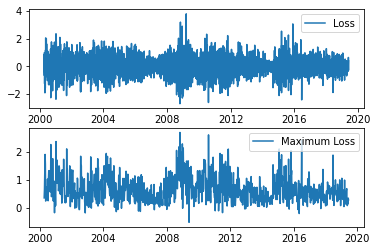

In [193]:
# plot loss data

fig,ax = plt.subplots(2,1)


ax[0].plot(rate_df['Loss'], label = 'Loss')
ax[1].plot(maxloss_df['Loss'], label = 'Maximum Loss')
ax[0].legend()
ax[1].legend()

In [213]:
# fit the frechet distribution using 500 data points

global_shape,global_loc,global_scale = invweibull.fit(maxloss_df['Loss'][:500].values)
1/global_shape,global_loc,global_scale


C:\Users\severusbot\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


(8.601300862123389e-09, -45758201.07348487, 45758201.54482546)

No handles with labels found to put in legend.


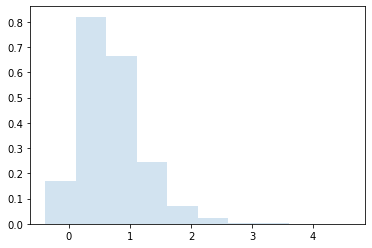

In [195]:
r = invweibull.rvs(global_shape,loc=global_loc,scale=global_scale, size=10000)
plt.hist(r, density=True, histtype='stepfilled', alpha=0.2)
plt.legend(loc='best', frameon=False)
plt.show()

(array([0.00623087, 0.23365767, 0.91282265, 0.90659178, 0.54831668,
        0.25858116, 0.15265635, 0.05919328, 0.03115436, 0.00934631]),
 array([-0.51641461, -0.19575287,  0.12490886,  0.44557059,  0.76623233,
         1.08689406,  1.40755579,  1.72821753,  2.04887926,  2.369541  ,
         2.69020273]),
 [<matplotlib.patches.Polygon at 0x1bd404a7160>])

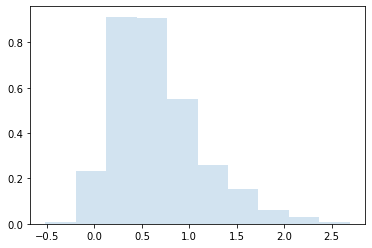

In [196]:
plt.hist(maxloss_df['Loss'], density=True, histtype='stepfilled', alpha=0.2)

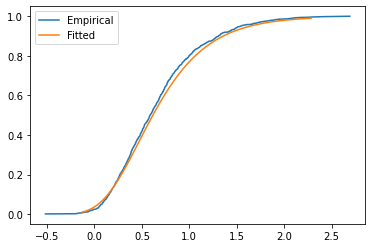

In [197]:
### Comparing Static distributions

ecdf=ECDF(maxloss_df['Loss'])
plt.plot(ecdf.x,ecdf.y,label='Empirical')

n=100
x = np.linspace(invweibull.ppf(0.01, global_shape,loc=global_loc,scale=global_scale),
                invweibull.ppf(0.99, global_shape,loc=global_loc,scale=global_scale), n)
frechet_cdf=invweibull.cdf(x,global_shape,loc=global_loc,scale=global_scale)
plt.plot(x,frechet_cdf,label='Fitted')
plt.legend()

In [198]:
# Time varying parameters

In [214]:
# we will use 250 samples

time_df = maxloss_df.copy()
time_df['Scale'] = np.nan
time_df['Shape'] = np.nan
time_df['Location'] = global_loc

def fit_invweibull(val):

    shape, loc, scale = invweibull.fit(val, floc = global_loc)
    print(1/shape, loc, scale)
    return 1/shape, loc, scale

for x in range(1, 251):
    time_df.iloc[250+x, 2], loc, time_df.iloc[250+x, 1] = fit_invweibull(maxloss_df['Loss'][:250+x])

#time_df = time_df.bfill(axis = 'rows')
time_df = time_df.reset_index()

#time_df

3.671518594687899e-08 -45758201.07348487 45758201.46507719
3.671518594687899e-08 -45758201.07348487 45758201.46507719
3.671518594687899e-08 -45758201.07348487 45758201.46507719
3.671518594687899e-08 -45758201.07348487 45758201.46507719
3.671518594687899e-08 -45758201.07348487 45758201.46507719
3.671518594687899e-08 -45758201.07348487 45758201.46507719
3.671518594687899e-08 -45758201.07348487 45758201.46507719
3.671518594687899e-08 -45758201.07348487 45758201.46507719
3.671518594687899e-08 -45758201.07348487 45758201.46507719
3.671518594687899e-08 -45758201.07348487 45758201.46507719
3.671518594687899e-08 -45758201.07348487 45758201.46507719
3.671518594687899e-08 -45758201.07348487 45758201.46507719
3.671518594687899e-08 -45758201.07348487 45758201.46507719
3.671518594687899e-08 -45758201.07348487 45758201.46507719
3.671518594687899e-08 -45758201.07348487 45758201.46507719
3.671518594687899e-08 -45758201.07348487 45758201.46507719
3.671518594687899e-08 -45758201.07348487 45758201.465077

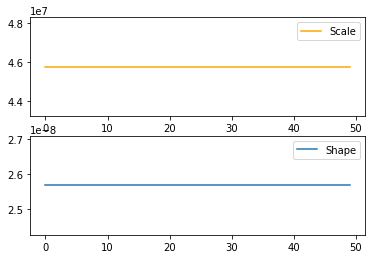

In [200]:
fig,ax = plt.subplots(2,1)

ax[1].plot(time_df['Shape'][400:450].values, label='Shape')
ax[0].plot(time_df['Scale'][400:450].values, label='Scale',color='orange') # flip returns to view
ax[0].legend()
ax[1].legend()

In [201]:
# estimating coefficients using the training set
temp_df = time_df.copy(deep = True)
temp_df = temp_df.dropna()

exog = -temp_df['Loss'][249:-1].values

mod = AutoReg(np.log(temp_df['Shape'][250:].values), 1, trend = 'c', exog = np.exp(exog))
res = mod.fit()
shape_params = res.params
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  251
Model:                   AutoReg-X(1)   Log Likelihood                 400.963
Method:               Conditional MLE   S.D. of innovations              0.049
Date:                Thu, 14 Apr 2022   AIC                             -6.014
Time:                        20:59:58   BIC                             -5.957
Sample:                             1   HQIC                            -5.991
                                  251                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.5466      0.303     -1.805      0.071      -1.140       0.047
y.L1           0.9668      0.017     55.472      0.000       0.933       1.001
x1            -0.0503      0.013     -3.794      0.0

C:\Users\severusbot\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


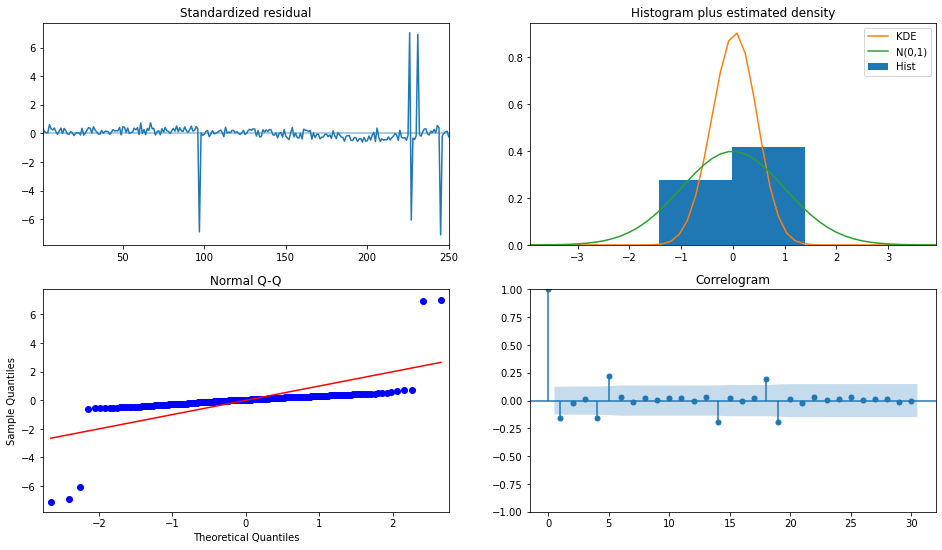

In [202]:
fig = plt.figure(figsize = (16, 9))
fig = res.plot_diagnostics(fig = fig, lags = 30)

In [203]:
exog = -temp_df['Loss'][224:-1].values

mod = AutoReg(np.log(temp_df['Scale'][225:].values), 1, trend = 'c', exog = np.exp(exog))
res = mod.fit()
scale_params = res.params
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  276
Model:                   AutoReg-X(1)   Log Likelihood                2985.444
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Thu, 14 Apr 2022   AIC                            -24.521
Time:                        20:59:59   BIC                            -24.469
Sample:                             1   HQIC                           -24.500
                                  276                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5129   1922.227      0.000      1.000   -3766.982    3768.008
y.L1           0.9709    108.977      0.009      0.993    -212.619     214.561
x1          6.675e-10   1.21e-06      0.001      1.0

C:\Users\severusbot\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


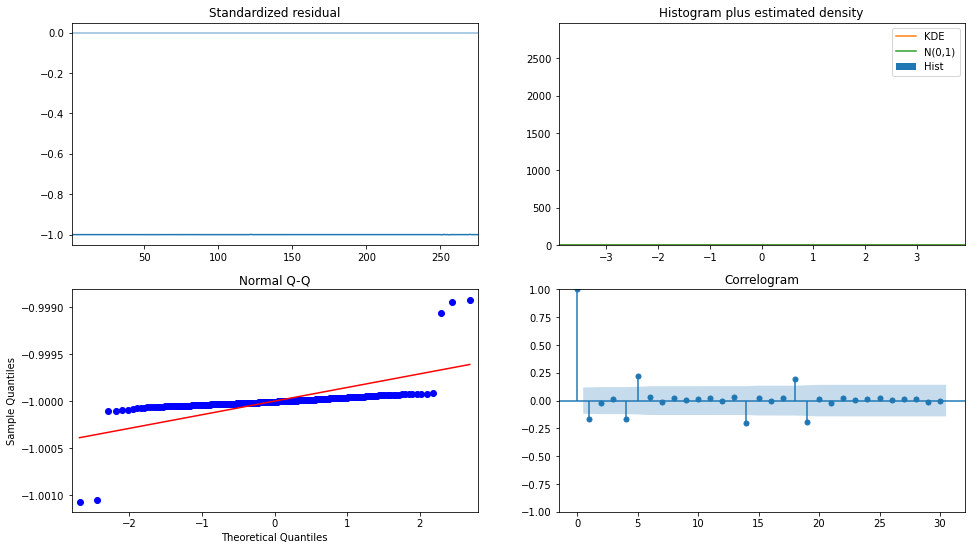

In [204]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)

In [205]:
# Using the test data set

#pd.set_option('display.max_rows', None)
cvar1=pd.Series([])
cvar2=pd.Series([])
cvar3=pd.Series([])

counter = 0

for x,row in time_df.iterrows():
    if not np.isnan(row['Shape']) and not np.isnan(row['Scale']) :
        counter=counter+1
        cvar1=cvar1.append(pd.Series([np.nan],index=[x]))
        cvar2=cvar2.append(pd.Series([np.nan],index=[x]))
        cvar3=cvar3.append(pd.Series([np.nan],index=[x]))
        continue
    #print(np.exp(shape_params[0]+shape_params[1]*np.log(time_df['Shape'][counter-1])+shape_params[2]*np.exp(-time_df['Loss'][counter-1]) ))

    time_df.at[x, 'Shape'] = np.exp(shape_params[0]+shape_params[1]*np.log(time_df['Shape'][counter-1])+shape_params[2]*np.exp(-time_df['Loss'][counter-1]) )# walk forward from our eqns
    time_df.at[x, 'Scale'] = np.exp(scale_params[0]+scale_params[1]*np.log(time_df['Scale'][counter-1])+scale_params[2]*np.exp(-time_df['Loss'][counter-1]) )# walk forward 
    
    # empirical cvars for each fitted period outside of train set #1 
    cvar1=cvar1.append(pd.Series([conditional_value_at_risk(time_df['Loss'][:counter],0.90)],index=[x]))
    cvar2=cvar2.append(pd.Series([conditional_value_at_risk(time_df['Loss'][:counter],0.95)],index=[x]))
    cvar3=cvar3.append(pd.Series([conditional_value_at_risk(time_df['Loss'][:counter],0.99)],index=[x]))
    
    counter=counter+1
time_df['cvar_0.1']=cvar1
time_df['cvar_0.05']=cvar2
time_df['cvar_0.01']=cvar3
    
#time_df

<ipython-input-205-f34d03d02c2c>:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  cvar1=pd.Series([])
<ipython-input-205-f34d03d02c2c>:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  cvar2=pd.Series([])
<ipython-input-205-f34d03d02c2c>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  cvar3=pd.Series([])


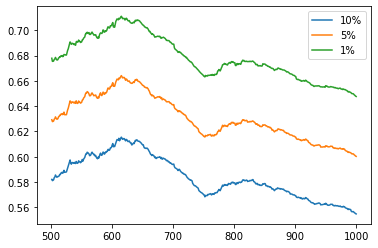

In [206]:
plt.plot(time_df['cvar_0.1'],label='10%')
plt.plot(time_df['cvar_0.05'],label='5%')
plt.plot(time_df['cvar_0.01'],label='1%')
plt.legend()

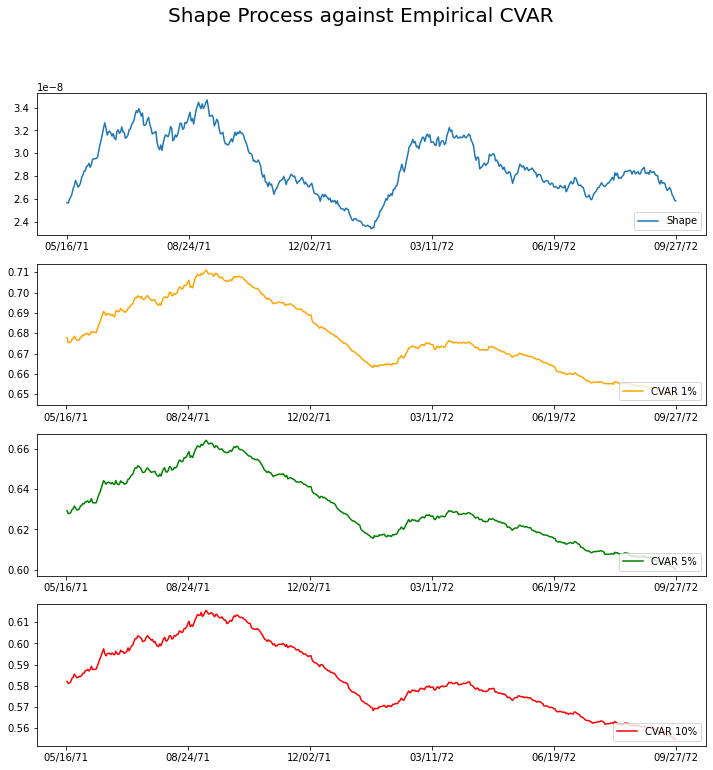

In [207]:
fig,ax = plt.subplots(4,1,figsize=(12,12))

fig.suptitle("Shape Process against Empirical CVAR",fontsize=20)

ax[0].plot(time_df['Shape'][500:], label='Shape')
ax[1].plot(time_df['cvar_0.01'][500:], label='CVAR 1%',color='orange') 
ax[2].plot(time_df['cvar_0.05'][500:], label='CVAR 5%',color='green') 
ax[3].plot(time_df['cvar_0.1'][500:], label='CVAR 10%',color='red') 
ax[0].legend(loc='lower right')
ax[1].legend(loc='lower right')
ax[2].legend(loc='lower right')
ax[3].legend(loc='lower right')
ax[0].xaxis.set_major_formatter(DateFormatter("%D"))
ax[1].xaxis.set_major_formatter(DateFormatter("%D"))
ax[2].xaxis.set_major_formatter(DateFormatter("%D"))
ax[3].xaxis.set_major_formatter(DateFormatter("%D"))